<h1>1. Breve Introdução</h1>

<p style="text-align:justify">
O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações em quase todos os lugares do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.
</p>
<p style="text-align:justify">
O conjunto de dados escolhido, dataset, fornece-nos informações sobre os hosts, a disponibilidade geográfica, as métricas necessárias para fazer previsões e tirar conclusões sobre o preço da hospedagem na cidade de Nova York, NY, no ano de 2019. Segue abaixo uma breve explicação sobre as colunas existentes e o que elas representam:
</p>
<ul>
    <li><b>ID / ID</b> - <i>id do estabelecimento;</i></li>
    <li><b>NAME / NOME</b> - <i>Nome do estabelecimento;</i></li>
    <li><b>HOST_ID / ID DO ANFITRIÃO</b> - <i>id do anfitrião;</i></li>
    <li><b>HOST_NAME / NOME DO ANFITRIÃO</b> - <i>Nome do Anfitrião;</i></li>
    <li><b>NEIGHBOURDHOOD_GROUP / DISTRITO</b> - <i>Nome do Distrito;</i></li>
    <li><b>NEIGHBOURHOOD / BAIRRO</b> - <i>Nome do Bairro;</i></li>
    <li><b>LATITUDE / LATITUDE</b> - <i>Localização medida em graus, de zero a 90 para norte ou para sul, a partir da Linha do Equador;</i></li>
    <li><b>LONGITUDE / LONGITUDE</b> - <i>Localização medida em graus, de zero a 180 para leste ou para oeste, a partir do Meridiano de Greenwich;</i></li>
    <li><b>ROOM_TYPE / TIPO DE QUARTO</b> - <i>Tipo de quarto;</i></li>
    <li><b>PRICE / PREÇO</b> - <i>Preço por noite;</i></li>
    <li><b>MINIMUM_NIGHTS / NÚMERO MÍNIMO DE NOITES</b> - <i>Número mínimo de noites para ficar no estabelecimento;</i></li>
    <li><b>NUMBER_OF_REVIEWS / NÚMERO DE AVALIAÇÕES</b> - <i>Número de avaliações que o estabelecimento recebeu;</i></li>
    <li><b>LAST_REVIEW / ÚLTIMA AVALIAÇÃO</b> - <i>Data da última avaliação que o estabelecimento recebeu;</i></li>
    <li><b>REVIEWS_PER_MONTH / AVALIAÇÕES POR MÊS</b> - <i>Avaliações que o estabelecimento recebeu por mês;</i></li>
    <li><b>CALCULATED_HOST_LISTINGS_COUNT / NÚMERO DE APARTAMENTOS</b> - <i>Número de estabelecimentos que o anfitrião possui;</i></li>
    <li><b>AVAILABILITY_365 / DISPONIBILIDADE</b> - <i>Número de dias que o estabelecimento está disponível durante o ano;</i></li>
</ul>

<h1>2. Importação das Bibliotecas</h1>

In [46]:
# pandas (analise do DataFrame e das variaveis pertencentes a ele)
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 

# numpy 
import numpy as np 

# matplotlib (plotar graficos referentes ao que se quer analisar)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# para plotar graficos do modelo "K-neighbors"
import mglearn 

# biblioteca de visualização de dados Python baseada em matplotlib
import seaborn as sns

# time (calular tempo gasto nos modelos)
from time import time

# warnings (deixar de poluir o documento com warnings)
import warnings
warnings.filterwarnings('ignore')

# scikit-learn (biblioteca de Machine Learning)
from sklearn.model_selection import train_test_split, cross_val_score #StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler, Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

# scikit-learn modelos (importação de modelos utilizados para análise da variável que se quer prever)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# função utilizada para exibir os scores dos modelos
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# classe criada para auxiliar as transformações na pipeline
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

%matplotlib inline 

<h1>3. Exploração e Preparação do Dataset</h1>

In [3]:
#Realizando a leitura do arquivo csv.
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [4]:
#Quantidade de linhas e colunas contidas no dataframe.
airbnb.shape

(48895, 16)

O pacote pandas permite tranformar o nosso dataset em um dataframe, que transforma os dados em uma estrutura de 2 dimensões, linhas e colunas, abaixo podemos visualizar os dados na forma de uma tabela.

In [5]:
#Utilizei a função "head" para obter uma prévia das primeiras 5 linhas do dataframe.
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h1>4. Limpeza de Dados</h1>

<p style="text-lign:justify">
    Para a análise de dados que desejamos fazer as variáveis id, name, minimum_nights e last_review não são necessárias, portando vamos retirá-las de nosso dataframe.
</p>

In [6]:
#Retirando variáveis desnecessárias.
airbnb = airbnb.drop(columns=["id","host_id","name","host_name","minimum_nights","last_review"])

In [7]:
#Visualizando dataframe após mudanças
airbnb.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,2,355


<p style="text-align:justify">
Um problema muito comum que encontramos ao trabalhar com grandes conjuntos de dados é a existência de valores nulos ou não preenchidos, que podem existir por erros de preenchimento, erros na importação e transformação dos dados, não existência da informação, ou qualquer outro motivo.
</p>

<p style="text-align:justify">
O tratamento que será para os valores nulos depende do nosso objetivo com a análise de dados. Podemos deixar os valores nulos caso eles não impactem negativamente na nossa análise. Podemos apagar a linha inteira que possuí um valor nulo. Podemos, até mesmo, preencher os valores nulos com um valor específico. Nesse contexto, existem inúmeras formas de tratar valores nulos, mas sempre devemos manter em mente o nosso objetivo com a análise de dados para decidir qual tratativa utilizar.
</p>

<p style="text-align:gustify">
Vamos analisar os valores nulos de cada coluna e montar uma estratégia de quais variáveis vamos manter nulas e quais vamos preencher com valores.
</p>

In [8]:
#Visualizando a quantidade de valores nulos em cada coluna.
airbnb.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<p style="text-align:justify">
Como podemos observar a única coluna com valores nulos é a coluna <b><i>reviews_per_month</i></b>, entretanto não será relevante para nossa análise preenchê-la, uma vez que não há problema em a quantidade de reviews ser igual a zero, portanto, podemos deixar os valores dessa coluna na forma original.
</p>

<h1>5. Visualização dos dados</h1>

<h3>5.1 Análise da variável <i>number_of_reviews</i></h3>

In [9]:
#Obtendo resumo estatístico da variável number_of_reviews.
airbnb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

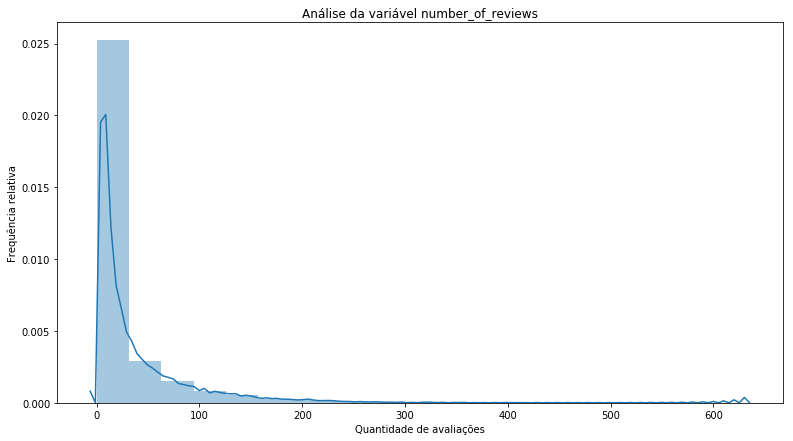

In [10]:
#Distribuição da variável number_of_reviews.
fig = plt.figure(figsize=(13,7))
sns.distplot(airbnb['number_of_reviews'], bins=20);
plt.title("Análise da variável number_of_reviews")
plt.xlabel("Quantidade de avaliações")
plt.ylabel("Frequência relativa");

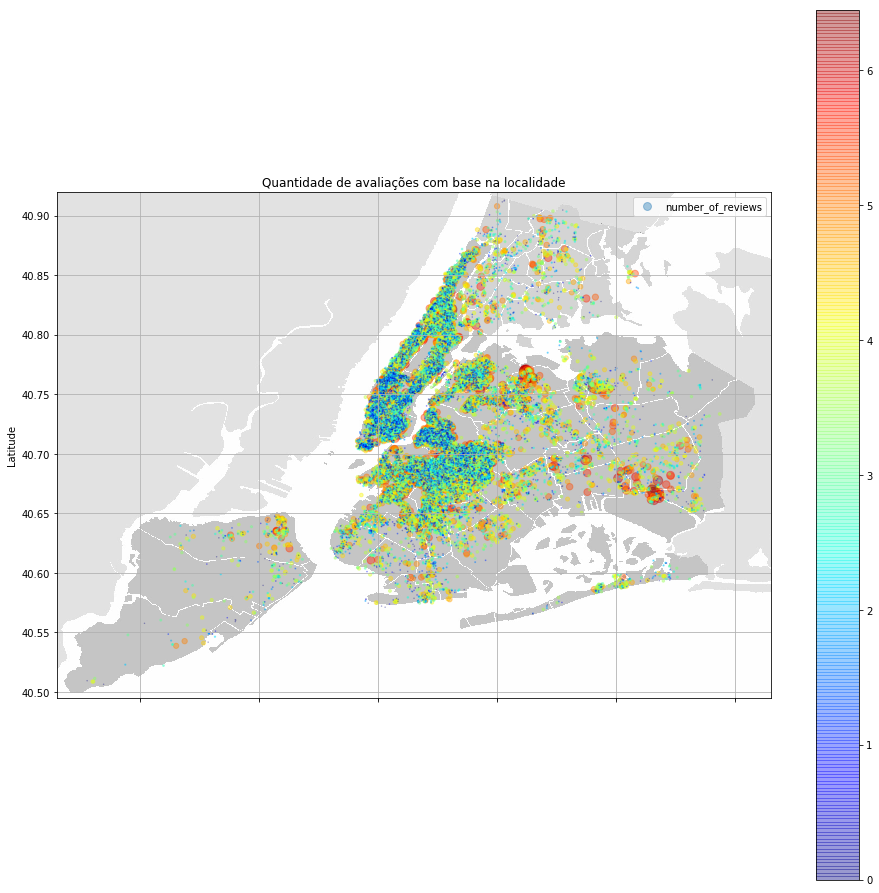

In [11]:
#Posição geografica dos estabelecimentos com reviews.
new_york = mpimg.imread('New_York_City_.png', 0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["number_of_reviews"]/5), grid=True, colorbar=True, c=np.log(airbnb["number_of_reviews"]), 
            cmap=plt.get_cmap("jet"), figsize=(16, 16), label="number_of_reviews", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.legend()
plt.title("Quantidade de avaliações com base na localidade")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<p style="text-align:justify">

No gráfico acima podemos visualizar a distribuição do número de reviews de todos os estabelecimentos do nosso conjunto de dados.

O comando "describe" nos dá algumas informações relevantes:
</p>

<ul>
    <li>Média do número de reviews = 23.27</li>
    <li>Número de reviews mínimo = 0.00</li>
    <li>Número de reviews máximo = 629.00</li>
</ul>
    
<p>
Além disso, plotamos um mapa da cidade de Nova York, NY, onde conseguimos observar a posição geografica dos estabelecimentos com mais reviews. A maioria encontra-se nos distritos: Manhattan e Brooklyn.
</p>

<h3>5.2 Análise da variável <i>price</i></h3>

In [12]:
#Obtendo resumo estatístico da variável price.
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

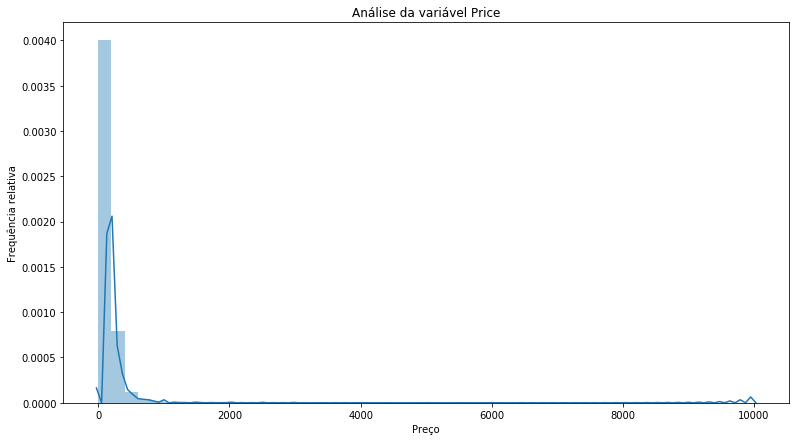

In [13]:
#Distribuição da variável number_of_reviews.
fig = plt.figure(figsize=(13,7))
sns.distplot(airbnb['price']);
plt.title("Análise da variável Price")
plt.xlabel("Preço")
plt.ylabel("Frequência relativa");

<h3>Remoção de outliers</i></h3>

In [14]:
# Existiam alguns poucos valores nulos ou muito altos que devem ser retirados.
airbnb = airbnb.sort_values("price", ascending=True).iloc[int(0.1*airbnb.shape[0]): int(0.9*airbnb.shape[0])].sort_index()

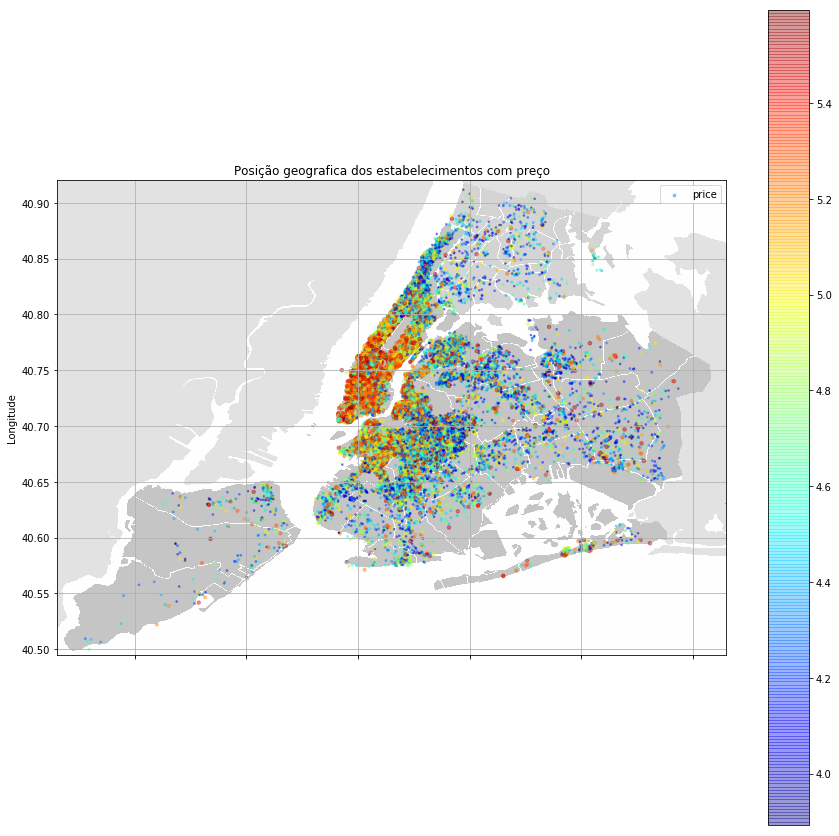

In [15]:
#Posição geografica dos estabelecimentos com preço.
new_york = mpimg.imread('New_York_City_.png',0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["price"])/20, grid=True, colorbar=True, c=np.log(airbnb["price"]), 
            cmap=plt.get_cmap("jet"), figsize=(15,15), label="price", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.xlabel("Longitude")
plt.ylabel("Longitude")
plt.legend()
plt.title("Posição geografica dos estabelecimentos com preço")
plt.show()

<p style="text-align:justify">

No gráfico acima podemos visualizar a distribuição do preço por noite de todos os estabelecimentos do nosso conjunto de dados.

O comando "describe" nos dá algumas informações relevantes:
</p>

<ul>
    <li>Média do preço = 152.72</li>
    <li>Preço mínimo = 0.00</li>
    <li>Preço máximo = 10000.00</li>
</ul>
    
<p>
Além disso, plotamos um mapa da cidade de Nova York, NY, onde conseguimos observar a posição geografica dos estabelecimentos com maior preço. O distrito com os maiores preços é Manhattan.
</p>

<h3>5.3 Análise da variável <i>room_type</i></h3>

In [16]:
#Inspeção de como se classificam os tipos de quarto.
airbnb["room_type"].value_counts() 

Entire home/apt    20905
Private room       17693
Shared room          518
Name: room_type, dtype: int64

<p style="text-align:justify">
    A váriável <b style="font-family:monospace;color:red">"room type"</b> parece ser discreta o bastante para ser utilizada no critério de separação estratificado (veremos mais à frente). 
</p>

<h3>5.4 Análise macro das variáveis</h3>

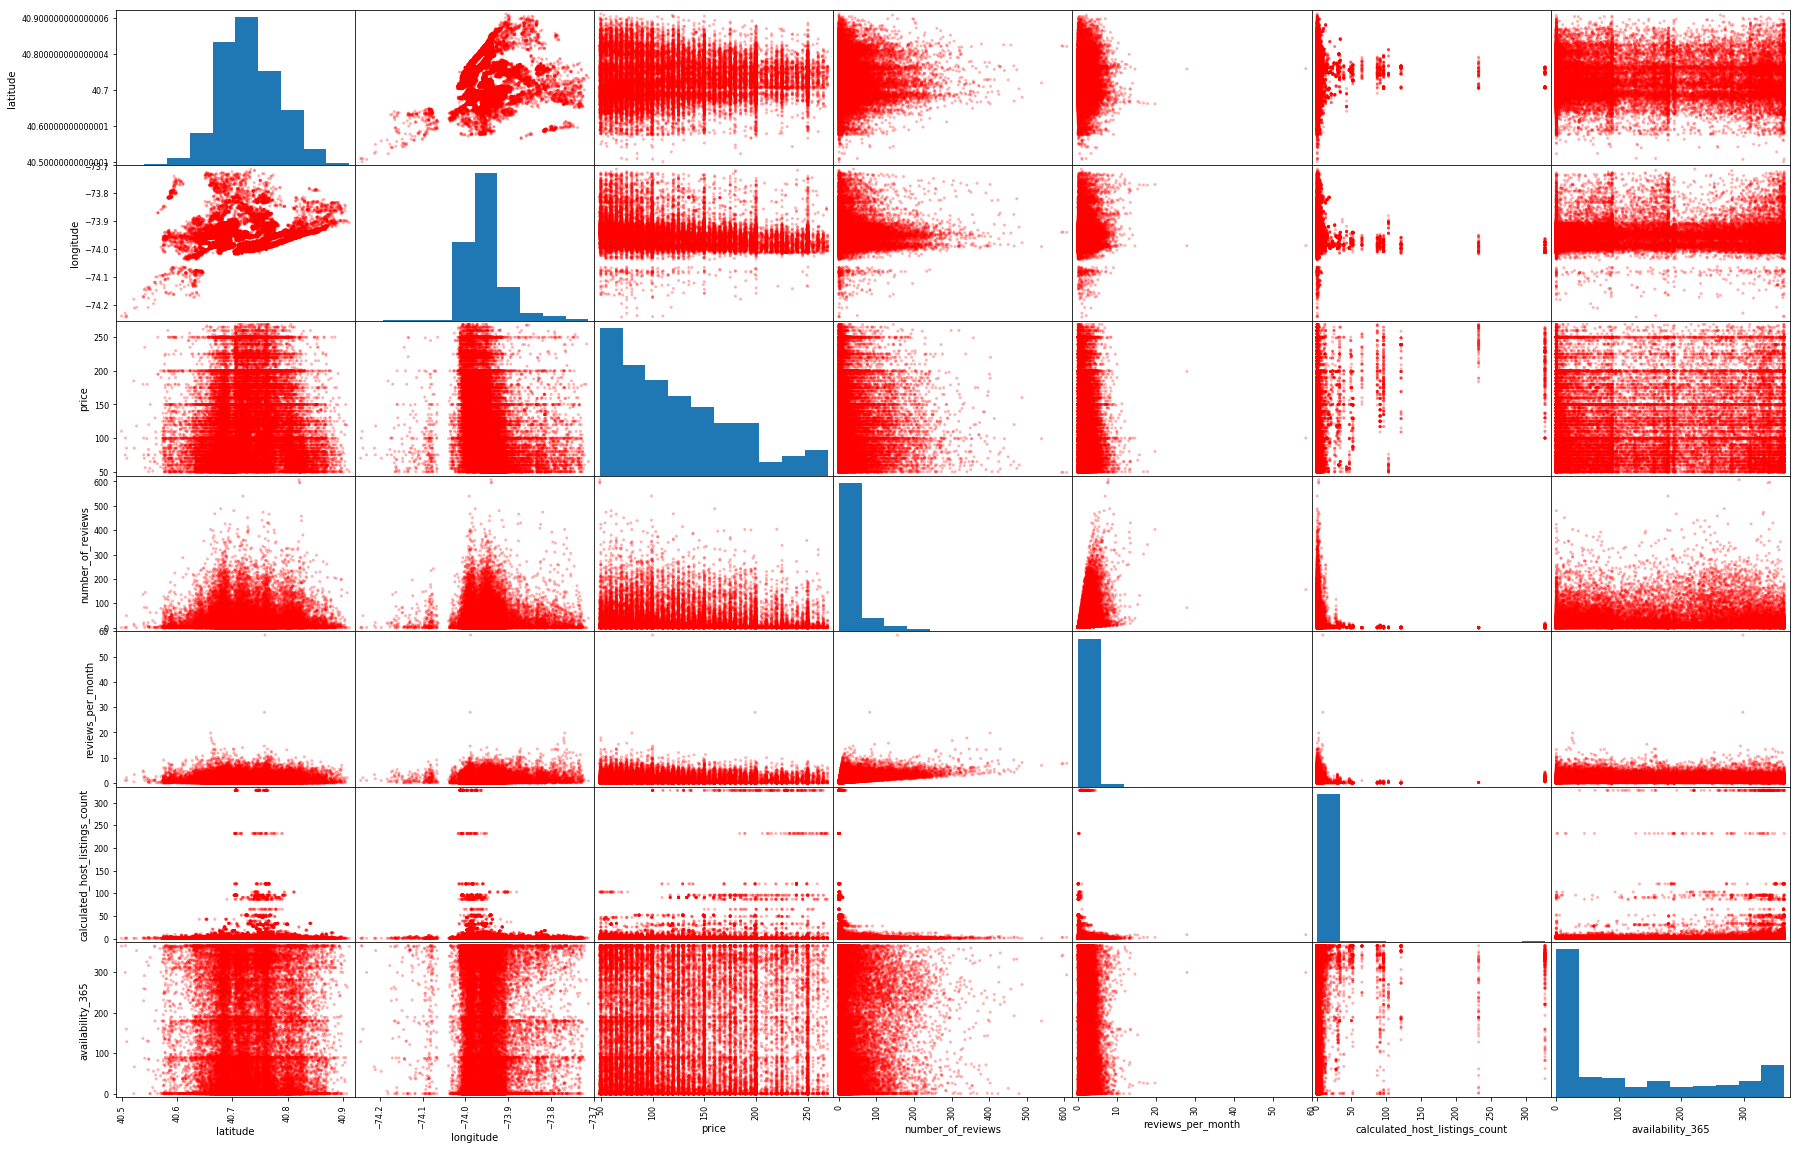

In [17]:
#scatter_matrix fornece a plotagem de todas as variáveis QUANTITATIVAS disponíveis no dataset.
scatter_matrix(airbnb[airbnb.columns], figsize=(30, 20), alpha=0.3, c='r')
plt.show();

<p style="text-align:justify">
Com base nos gráficos acima, nota-se que a análise macro não permite a observação de tendências nos dados.
</p>

<h1>6. Medindo a Relação entre Variáveis</h1>

<p style="text-align:justify">
Muitas vezes, quando trabalhamos com análise de dados, é de grande utilidade medirmos a relação entre duas variáveis relevantes para o objetivo que se quer atingir. Este conceito serve de base para criação de alguns tipos de modelos preditivos. Explicando de forma simplificada: se sabemos a relação entre a variável X e a variável Y, conseguimos criar um modelo matemático que irá, possuindo apenas novas variáveis de entrada X, prever a variável de saída Y.
</p>

<p style="text-align:justify">
A medida da força da correlação é expressa como um coeficiente, chamado de coeficiente de correlação de Pearson e ele assume valores entre -1 e 1, de forma que:
</p>

<ul>
    <li>0.9 a 1.0 positivo ou negativo indica uma correlação muito forte;</li>
    <li>0.7 a 0.9 positivo ou negativo indica uma correlação forte;</li>
    <li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada;</li>
    <li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca;</li>
    <li>0 a 0.3 positivo ou negativo indica uma correlação desprezível;</li>
</ul>

<p>Vamos agora explorar a relação entre as variáveis do nosso conjunto de dados:</p>

In [18]:
#Gerando uma tabela com a correlação entre todas as variáveis do nosso dataframe.
airbnb.corr()

,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.079702,0.041032,-0.017075,-0.020957,0.018445,-0.016807
longitude,0.079702,1.000000,-0.278166,0.052656,0.153641,-0.112473,0.103974
price,0.041032,-0.278166,1.000000,-0.039807,-0.060957,0.178494,0.056974
number_of_reviews,-0.017075,0.052656,-0.039807,1.000000,0.552847,-0.066025,0.192175
reviews_per_month,-0.020957,0.153641,-0.060957,0.552847,1.000000,-0.012707,0.191753
calculated_host_listings_count,0.018445,-0.112473,0.178494,-0.066025,-0.012707,1.000000,0.227045
availability_365,-0.016807,0.103974,0.056974,0.192175,0.191753,0.227045,1.000000


<p>Outra forma visual de verificarmos a correlação entre as variáveis:</p>

In [19]:
#função que plota um gráfico de correlação
def plot_corr(df, size=8):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (2.5*size, 2.5*size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

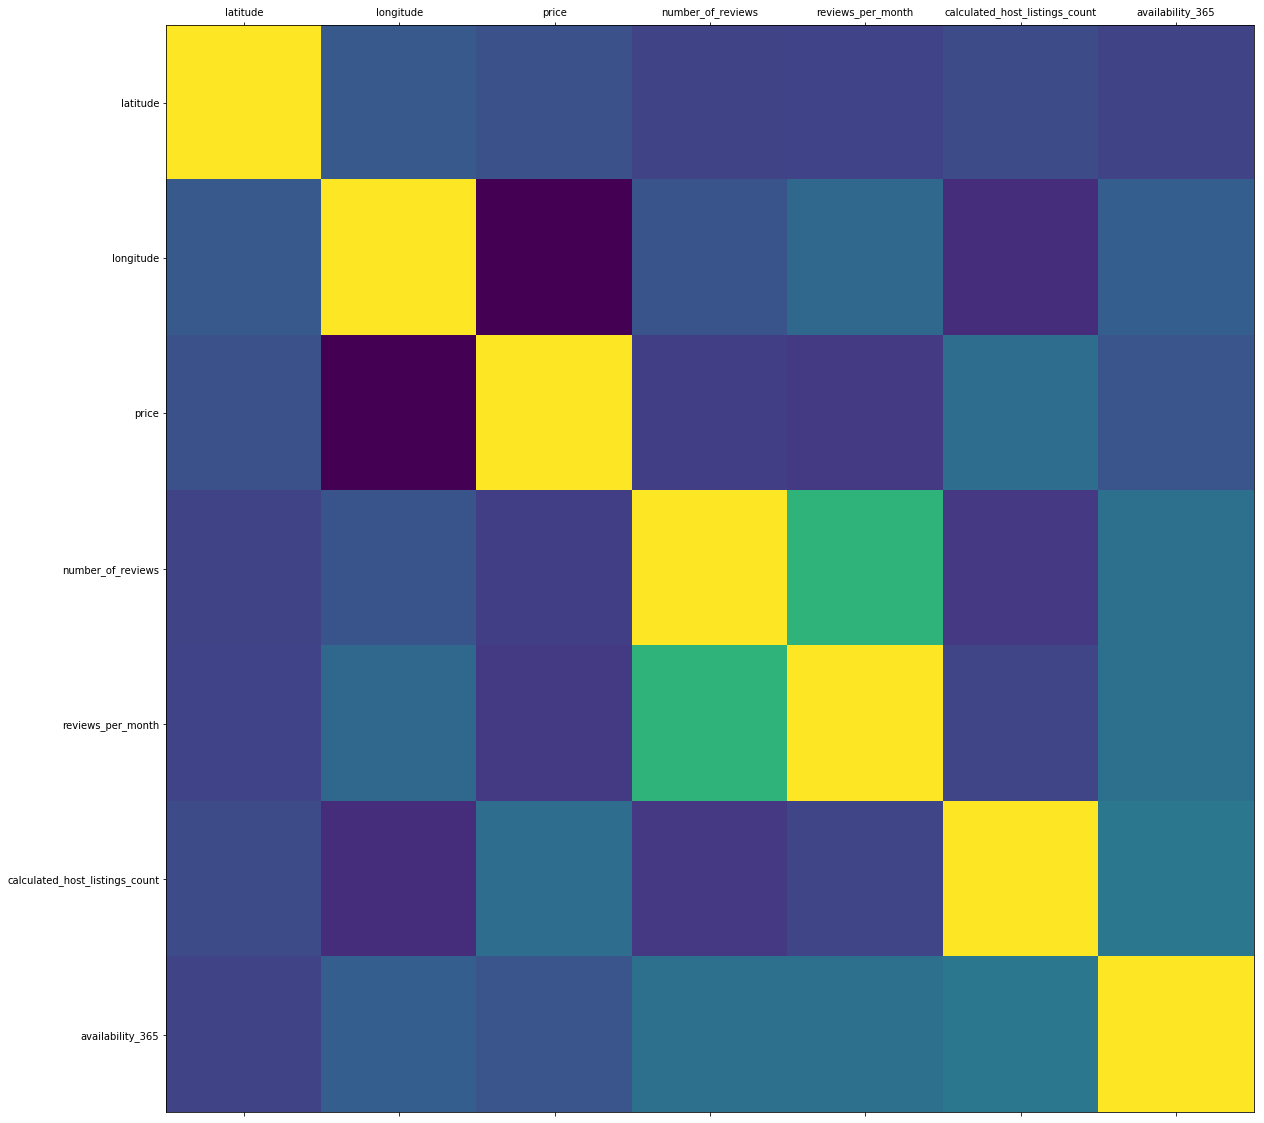

In [20]:
plot_corr(airbnb)

<p style="text-align:justify">
Ao analisarmos as correlações com a tabela e com o gráfico acima, percebemos que as únicas variáveis que possuem uma correlação "significativa" são as variáveis "reviews_per_month" e "Number_of_reviews".

Com um coeficiente de Pearson de 0.55, significa que possuem uma correlação moderada e que dependendo do objetivo e da precisão necessária para o nosso projeto poderiamos criar um modelo preditivo para, com base em uma variável, prever a outra. Entretando, como mencionamos anteriormente, nosso objetivo não é prever o número de reviews e sim o preço de hospedagem. 
</p>

<p style="text-align:justify">
Apesar de nossas variáveis não apresentarem uma correlação significativa podemos tentar prever o preço mesmo assim. Pois vamos utilizar um ferramental poderoso!
</p>      

<h1>7. Agora vamos ao nosso modelo preditivo</h1>

<p style="text-align:justify">
Basicamente, um modelo preditivo é uma função matemática que aplicada a um conjunto de dados, consegue identificar padrões ocultos, e com base nesses padrões, realizar previsões. O objetivo do aprendizado de máquina, Machine Learning, é "aprender" a aproximação da função que melhor representa a relação entre os atributos de entrada, variáveis preditoras, com a variável de saída, a qual queremos prever.
</p>

<p style="text-align:justify">
Os algoritmos de aprendizagem de máquina são divididos, na maioria das vezes, em 3 tipos: Aprendizagem Supervisionada, Aprendizagem Não Supervisionada e Aprendizagem por Reforço.
</p>

<h1>8. O Processo</h1>

<p style="text-align:justify">
De forma simplificada, o processo para a criação de um modelo preditivo é composto pela sequência de atividades:
</p>

<ul>
    <li>1 - Coleta de Dados;</li>
    <li>2 - Exploração e Preparação dos Dados;</li>
    <li>3 - Treinamento do Modelo;</li>
    <li>4 - Avaliação do Modelo;</li>
    <li>5 - Otimização do Modelo;</li>
</ul>

<p style="text-align:justify">
Essas atividades são realizadas iterativamente, modificando parâmetros, organizando dados, obtendo novos dados, testando algoritmos, criando novas variáveis, entre outras, até que se tenha o modelo ideal para resolver o problema de negócios em que estamos trabalhando.
</p>

<h1>9. Preparação dos Dados</h1>

<p style="text-align:justify">
Normalmente, a criação do modelo preditivo em si é bem rápida se comparada ao tempo que o cientista de dados precisar dedicar para preparar o conjunto de dados, pois os dados podem vir de diversas fontes, em diversos formatos, com erros ou necessitando de manipulações. Cabe a nós realizarmos as atividades que irão garantir que o modelo preditivo receba corretamente as informações de entrada. A etapa de preparação dos dados, a qual fizemos anteriormente, é de extrema importância para garantir a precisão do nosso modelo. Tendo como certo que dados de entrada ruins irão gerar saídas ruins, deve-se ter como premissa nunca devemos negligenciar esta etapa.
</p>

<h1>10. Escolha das Variáveis Preditoras</h1>

<p>
Classificaremos nossas variáveis em dois tipos:
</p>
<ul>
    <li>Variáveis preditoras: são as variáveis que serão utilizadas como entrada para o modelo preditivo;</li>
    <li>Variáveis targets: são as variáveis que queremos prever;</li>
</ul>
   
<p style="text-align:justify">
Como foi mencionado anteriormente, queremos prever o preço de hospedagem em um estabelecimento do airbnb em Nova York, NY, com base no conjunto de dados obtidos no site Kaggle. Logo a nossa variável target é a coluna <b><i>price</i></b>.
</p>

<p>Nossas variáveis preditoras serão: <b><i>neighbourhood_group</i></b>, <b><i>neighbourhood</i></b>, <b><i>latitude</i></b>, <b><i>longitude</i></b>, <b><i>room_type</i></b>, <b><i>number_of_reviews</i></b>, <b><i>reviews_per_month</i></b>, <b><i>calculated_host_listings_count</i></b>, <b><i>availability_365</i></b></p>

<h1>11. Separação em Treinamento e Teste</h1>

<p style="text-align:justify">
Devemos dividir o nosso conjunto de dados em 2 partes, uma para treino e outra para teste do modelo preditivo. Não existe uma regra geral para a divisão dos dados, utilizaremos uma divisão 80/20 (80% dos dados para treino e 20% dos dados para teste). O que devemos nos atentar é para que a amostra separada represente de forma confiável toda a nossa população de dados.
</p>

In [42]:
""" 
Para garantir que teste e treinamento podem representar bem a população, utilizaremos "room_type" como critério. 
A função do Scikit-Learn chamada StratifiedShuffleSplit será utilizada para manter a mesma proporção da variável
em ambos os conjuntos (teste e treinamento).
"""
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
#    strat_train_set = airbnb.loc[train_index]
#    strat_test_set = airbnb.loc[test_index]

In [43]:
# descartaremos todo o dataset original e atribuiremos a ele o conjunto de tratamento de agora em diante
# airbnb_labels será o "gabarito" de nossa base de treinamento
#airbnb = strat_train_set.dropna().drop("price", axis=1)
#airbnb_labels = strat_train_set.dropna()["price"].copy()

In [21]:
# verificação de integridade do dataset
airbnb.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,2,355


In [22]:
airbnb_labels = airbnb["price"]
airbnb_labels.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [24]:
# base de dados que sera usada para split
airbnb_treinamento = airbnb.drop("price", axis=1)

In [25]:
# verificação dos tamanhos de cada dataframe
airbnb_treinamento.shape, airbnb_labels.shape

((39116, 9), (39116,))

In [32]:
"""
Aqui temos algo semelhante a uma linha de montagem. Com a ajuda de ferramentas embutidas no scikit-learn, podemos
preparar uma série de transformações pelas quais passarão novos dados ao serem inseridos no modelo.
"""


cat_attribs = ["neighbourhood_group","neighbourhood","room_type"] # lista de colunas qualitativas
num_attribs = list(airbnb_treinamento.drop(columns=cat_attribs).columns) # lista de colunas quantitativas


num_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(num_attribs) ), # selecionar as colunas numéricas (num_attribs)
    ( 'imputer', SimpleImputer(strategy="median")), # preencher dados vazios/NaN pela mediana da coluna
    ( 'std_scaler', StandardScaler() ) # normalizar os dados das colunas selecionadas
])
cat_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(cat_attribs) ), # selecionar as colunas categóricas (cat_attribs) 
    ( 'label_encoder', OneHotEncoder(handle_unknown="ignore")) # aplicar "OneHotEncoder" em todas as colunas qualitativas
])
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attribs), # aplicar a pipeline numerica
    ("cat_pipeline", cat_pipeline, cat_attribs), # aplicar a pipeline categórica
])


In [33]:
# passar todos os dados da tabela airbnb pela pipeline transformação
airbnb_prepared = full_pipeline.fit_transform(airbnb_treinamento)

In [36]:
# verificação de dimensões da nova matriz de dados
airbnb_prepared.shape

(39116, 233)

Podemos ver que ao invés de 9 colunas, agora temos <b style="color:red">223</b>. Isso se deve à quantidade de features pertencentes ao modelo (todos os nomes de bairros, vizinhanças, e tipo de quarto.

In [37]:
# separar em uma de treinamento e teste:
# X_train, y_train -> bases utilizadas para treinamento do modelo 
# x_test -> base usada para prever valores do price
# y_train -> gabarito

RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(airbnb_prepared, airbnb_labels, test_size=0.33, random_state=RANDOM_SEED)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26207, 233), (12909, 233), (26207,), (12909,))

In [42]:
# Separação de 5 linhas do novo dataframe apenas para análise futura
some_labels = airbnb_labels.iloc[:5]

In [ ]:
# Separação de 5 linhas do novo dataframe apenas para análise futura
some_data = airbnb_treinamento.iloc[:5]

In [43]:
# passar todos os dados da tabela some_data pela pipeline transformação
some_data_prepared = full_pipeline.transform(some_data)

<h1>12. Criando Modelo Preditivo - Análise: Regressão</h1>

<h2>12.1 Modelo 1 - Regressão Linear</h2>

<p style="text-align:justify">
Expliquem seus respectivos modelos aqui.... comentem cada parte do código!
</p>

In [170]:
time_init = time()

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

time_exit = time()
print("Tempo gasto: {:.2f} segundos".format(time_exit - time_init))

Tempo gasto: 0.16 segundos


In [171]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [147.79799955  87.82699195 140.79354333  81.67548095 130.44847028]
Labels:		 [125.0, 72.0, 110.0, 62.0, 96.0]


In [172]:
airbnb_predictions = lin_reg.predict(airbnb_prepared)

In [173]:
lin_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

38.851003162012894

In [174]:
time_init = time()
lin_scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 1.49 segundos


In [175]:
display_scores(lin_rmse_scores)

Scores: [40.51393835 38.61063197 37.99794876 38.78710661 39.14698997 38.558961
 38.76682771 40.15302831 40.40312009 39.82315843]
Mean: 39.2761711208519
Standard deviation: 0.8352630144473753


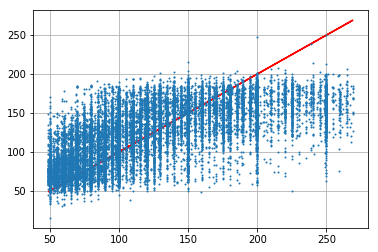

In [176]:
plt.plot(airbnb_labels, airbnb_labels, 'r-', markersize=2)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<p style="text-align:justify"> 
conclusão da previsão
</p>

<h2>12.2 Modelo 2 - Regressão K-Nearest Neighbors</h2>

<p style="text-align:justify">
Esse tipo de algoritmo pode ser utilizado tanto para classificações como para regressões. 
    
Para esse caso, como o próprio título já sugere, o modelo será focado em uma regressão, de tal forma que se consiga prever o preço de determinada residência tomando como base em uma medida de similaridade.

De forma simplificada, esse modelo trabalhará da seguinte forma:

O "test prediction" mostrado abaixo refere-se a variável na qual se quer prever. Essa variável será prevista pela k-neighbors regressor com base nos pontos de treinamento próximos a ela. Para a escolha dos pontos, deve-se mudar o valor dado ao argumento "n_neighbors", visto no comando abaixo. 

Vale ressaltar, no entanto, que um valor alto dado para esse argumento não implica necessariamente em uma melhoria do modelo. Portanto, a escolha desse valor deve ser feita de forma criteriosa para que se possa chegar a melhor predição possível.

A predição ocorre como é ilustrado nos gráficos abaixo:
</p>

###### n_neighbors = 7

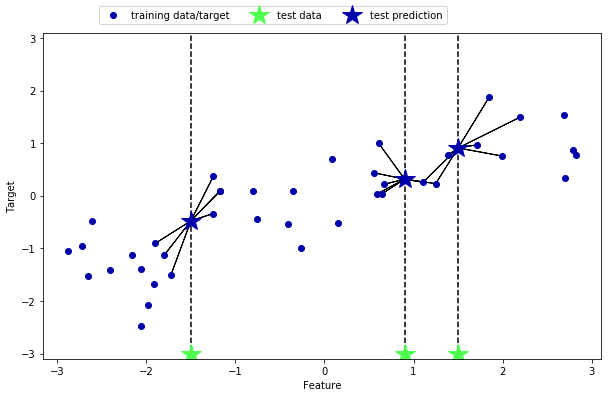

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=7)

###### n_neighbors = 3

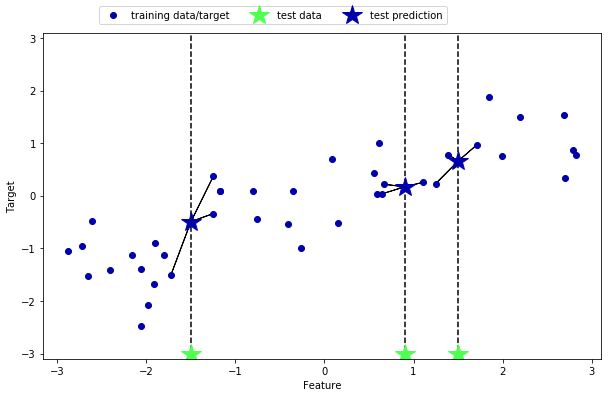

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=3);

In [80]:
# n_neighbors -> Número de vizinhos a serem usados
k_reg = KNeighborsRegressor(n_neighbors=5)

In [81]:
# treinamento do modelo
k_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [82]:
print("Análise de alguns preços predições x reais: \n")

print("Predições iniciais:\t", list(k_reg.predict(some_data_prepared)))
print("Valores reais:\t\t", list(some_labels))

Análise de alguns preços predições x reais: 

Predições iniciais:	 [103.4, 181.2, 98.0, 156.8, 157.8]
Valores reais:		 [149, 225, 150, 89, 80]


Abaixo, a função .predict será utilizada para prever, com base no modelo que está sendo usado, os preços do novo banco de dados que foi preparado acima, chamado "X_test".

In [83]:
airbnb_predictions = k_reg.predict(X_test)

In [84]:
r2_knn = r2_score(y_test, airbnb_predictions)
print("R² = {:.2f}".format(r2_knn))

R² = 0.43


In [85]:
time_init = time()

k_reg_scores = cross_val_score(k_reg, airbnb_prepared, airbnb_labels, cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 79.98 segundos


In [86]:
k_reg_scores

array([0.35731972, 0.37884023, 0.40225627, 0.43659845, 0.39744656,
       0.40523286, 0.39471864, 0.41211861, 0.46795399, 0.43436092])

In [87]:
display_scores(k_reg_scores)

Scores: [0.35731972 0.37884023 0.40225627 0.43659845 0.39744656 0.40523286
 0.39471864 0.41211861 0.46795399 0.43436092]
Mean: 0.4086846241042328
Standard deviation: 0.029777049439767573


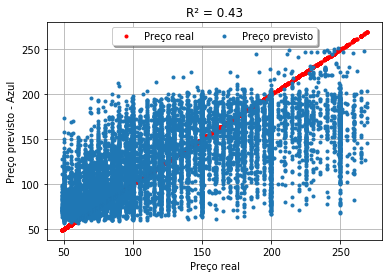

In [94]:
ax = plt.subplot(111)
plt.plot(y_test, y_test, 'r.', label='Preço real')
plt.plot(y_test, airbnb_predictions, '.', label='Preço previsto')
plt.grid(True)
plt.title("R² = 0.43")
plt.xlabel("Preço real")
plt.ylabel("Preço previsto - Azul")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

Vale ressaltar que os preços previstos bem como o treinamento do modelo foram feitos tendo como base os pontos mais próximos, como foi explicado acima. Portanto, os valores plotados acima estão conforme o valor que argumento <b><i>n_neighbors</i></b> - recebido pela função <b><i>KNeighborsRegressor</i></b> - tiver. 

Em vista disso, como não podemos assumir que 5 é o valor que melhor aperfeiçoará o R² da regressão utilizada, plotaremos, a seguir, valores correspondentes ao R² dos valores previstos para cada <b><i>n_neighbors</i></b> dentro de um intervalo pré-definido.

In [73]:
for n in range(12, 23):
    k_reg = KNeighborsRegressor(n_neighbors= n)
    k_reg.fit(X_train, y_train)
    airbnb_predictions = k_reg.predict(X_test)
    r2_knn = r2_score(y_test, airbnb_predictions)
    print("Para n = {0}: R² = {1:.3f}".format(n, r2_knn))

Para n = 12: R² = 0.474
Para n = 13: R² = 0.477
Para n = 14: R² = 0.478
Para n = 15: R² = 0.478
Para n = 16: R² = 0.479
Para n = 17: R² = 0.479
Para n = 18: R² = 0.480
Para n = 19: R² = 0.480
Para n = 20: R² = 0.480
Para n = 21: R² = 0.479
Para n = 22: R² = 0.479


Conforme vê-se acima, existe um "ponto ótimo" para em qua o argumento <b><i>n_neighbors</i></b> recebe um valor igual a 20, pois ele otimiza o valor do R². Portanto, utilizaremos esse valor para, futuramente, plotarmos um gráfico que corresponda aos valores previstos pela regressão de forma que ele sejam os mais próximos dos valores dos preços reais.

In [89]:
# os mesmos passos iniciais serão realizados nesse passo
k_reg = KNeighborsRegressor(n_neighbors=20)

# treinamento do modelo
k_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [90]:
print("Análise de alguns preços predições x reais: \n")

print("Predições iniciais:\t", list(k_reg.predict(some_data_prepared)))
print("Valores reais:\t\t", list(some_labels))

Análise de alguns preços predições x reais: 

Predições iniciais:	 [90.45, 173.8, 99.55, 142.35, 148.75]
Valores reais:		 [149, 225, 150, 89, 80]


In [91]:
airbnb_predictions = k_reg.predict(X_test)

In [79]:
r2_knn = r2_score(y_test, airbnb_predictions)
print("Como era esperado...")
print("R² = {:.2f}".format(r2_knn))

Como era esperado...
R² = 0.48


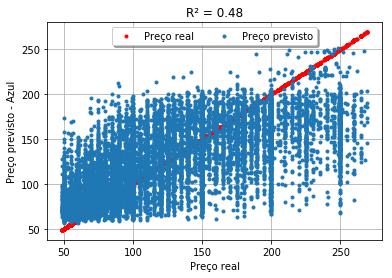

In [93]:
ax = plt.subplot(111)
plt.plot(y_test, y_test, 'r.', label='Preço real')
plt.plot(y_test, airbnb_predictions, '.', label='Preço previsto')
plt.grid(True)
plt.title("R² = 0.48")
plt.xlabel("Preço real")
plt.ylabel("Preço previsto - Azul")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

Para concluir, de acordo com o valor do R² encontrado, pode-se afirmar que esse modelo é razoavelmente bom para gerar predições. Todavia, mais a frente serão apresentados modelos que conseguem otimizar a previsão e aperfeiçoar ainda mais o R².

<h2>12.3 Modelo 3 - Decision Tree</h2>

<p style="text-align:justify">
Expliquem seus respectivos modelos aqui.... comentem cada parte do código!
</p>

In [183]:
time_init = time()

tree_reg = DecisionTreeRegressor()
tree_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 1.33 segundos


In [184]:
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [125.  72. 110.  62.  96.]
Labels:		 [125.0, 72.0, 110.0, 62.0, 96.0]


In [185]:
airbnb_predictions = tree_reg.predict(airbnb_prepared)

In [186]:
tree_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [187]:
time_init = time()

scores = cross_val_score(tree_reg, airbnb_prepared, airbnb_labels,
    scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 12.04 segundos


In [188]:
display_scores(rmse_scores)

Scores: [53.14623659 53.51930387 51.73946472 53.54880724 51.88286679 52.03122392
 53.26611023 53.51224817 52.23366177 52.90883446]
Mean: 52.778875776491965
Standard deviation: 0.6933651985073362


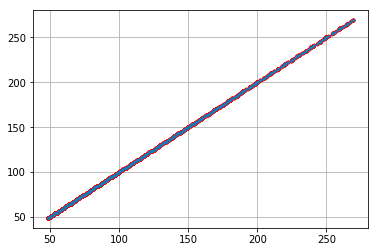

In [189]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=5)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<p style="text-align:justify"> 
conclusão da previsão
</p>

<h2>12.4 Modelo 4 - Random Forest</h2>

<p style="text-align:justify">
Expliquem seus respectivos modelos aqui.... comentem cada parte do código!
</p>

In [190]:
time_init = time()

forest_reg = RandomForestRegressor()
forest_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 9.31 segundos


In [191]:
time_init = time()

forest_rmse_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 76.13 segundos


In [192]:
print("Predictions:\t", forest_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [127.5  80.3 118.   61.9 106.8]
Labels:		 [125.0, 72.0, 110.0, 62.0, 96.0]


In [193]:
display_scores(forest_rmse_scores)

Scores: [-1676.81694766 -1580.19619268 -1456.74761464 -1580.6681056
 -1522.49633627 -1561.27998147 -1534.28346154 -1703.18205283
 -1704.31136701 -1625.65470806]
Mean: -1594.5636767757958
Standard deviation: 78.04021315694214


In [194]:
airbnb_predictions = forest_reg.predict(airbnb_prepared)

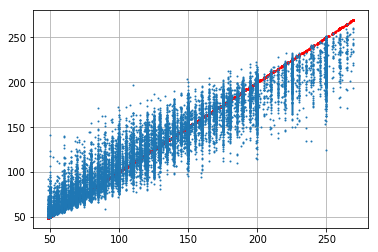

In [195]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=3)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<p style="text-align:justify"> 
conclusão da previsão
</p>

<h1>13. Resultados</h1>

In [196]:
#print("Regressão Linear: {0:.4f}".format()))
#print("Regressão Logística: {0:.4f}".format()))
#print("Deciosion Tree: {0:.4f}".format()))
#print("Random Forest: {0:.4f}".format()))

<b>breve análise</b>
<p>
A análise exploratória analisou bem a variável de saída usando técnicas adequadas (quali/quant?)</p>
<p>A análise exploratória analisou distribuição da variável de saída em função das variáveis de entrada e ocorrências conjuntas?</p>
<p>A análise exploratória mostrou frequências relativas e o erro de Bayes?</p>
<p>A análise exploratória usou muitos recursos gráficos para que seja possível entender distribuição e outliers da variável de saída, e ocorrências conjuntas?
</p>


<p>Poderíamos realizar atividades para melhorar o desempenho do modelo, cada projeto que realizamos demanda uma precisão, muitas vezes teremos de realizar o treinamento do modelo de maneira iterativa, comparando algoritmos, testando novas variáveis preditoras, criando novas variáveis, obtendo mais dados ou realizando manipulações no conjunto de dados antes do trabalho ser finalizado. Lembrando sempre que a precisão do modelo deve atender ao necessário para resolver o problema de negócios em que estamos trabalhando.</p>



<h1>Conclusão e Publicação do Modelo</h1>

<p style="text-align:justify">
Tão importante quanto criar o modelo preditivo, é realizar a publicação dele, isso significa, coloca-lo para fazer aquilo que ele foi criado.
</p>

<p>
Devemos considerar que o aprendizado pode ser feito de duas formas:
</p>

<ul>
    <li><b>Aprendizado offline:</b> O modelo é treinado uma vez em dados históricos e implantado de forma constante, e se necessário reestruturado caso se torne instável.</li>
    <li><b>Aprendizado online:</b> O modelo é constantemente atualizado à medida que novos dados chegam.</li>
</ul>
    
<p>
Também precisamos definir como o algoritmo fará as previsões:
</p>

<ul>
    <li><b>Previsões em lote:</b> Dados de entrada são processados e o algoritmo gera uma tabela de previsões, funcionam bem quando a saída não precisa ser atualizada o tempo todo.</li>
    <li><b>Previsões sob demanda:</b> As previsões são feitas em tempo real usando os dados de entrada disponíveis no momento da solicitação.</li>
</ul>

<p style="text-align:justify">
Lembrando que todo modelo preditivo é criado para resolver um problema específico de negócio, e ele pode ser entregue e aplicado de inúmeras formas: aplicações Web, como parte de um sistema ERP, sites interativos, Dashboards, relatórios, apresentações na empresa. Ou seja, a publicação do modelo deve ser levada em consideraçao dentro do planejamento do processo de trabalho do Cientista de Dados.
</p>

Observação sobre a publicação do modelo aqui ~~~

<h1>Referências</h1>

https://www.airbnb.com.br/help/article/2503/o-que-%C3%A9-o-airbnb-e-como-ele-funciona

https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

http://datascienceacademy.com.br/blog/como-publicar-um-modelo-de-machine-learning-em-producao/